<a href="https://colab.research.google.com/github/ankitkarmakar95/learnings/blob/Data-science/Fitbitmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
fitbit=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/FitbitTracker.xlsx')

In [ ]:
fitbit.head()

,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,25,13,328,728,1985
1,21,19,217,776,1797
2,30,11,181,1218,1776
3,29,34,209,726,1745
4,36,10,221,773,1863


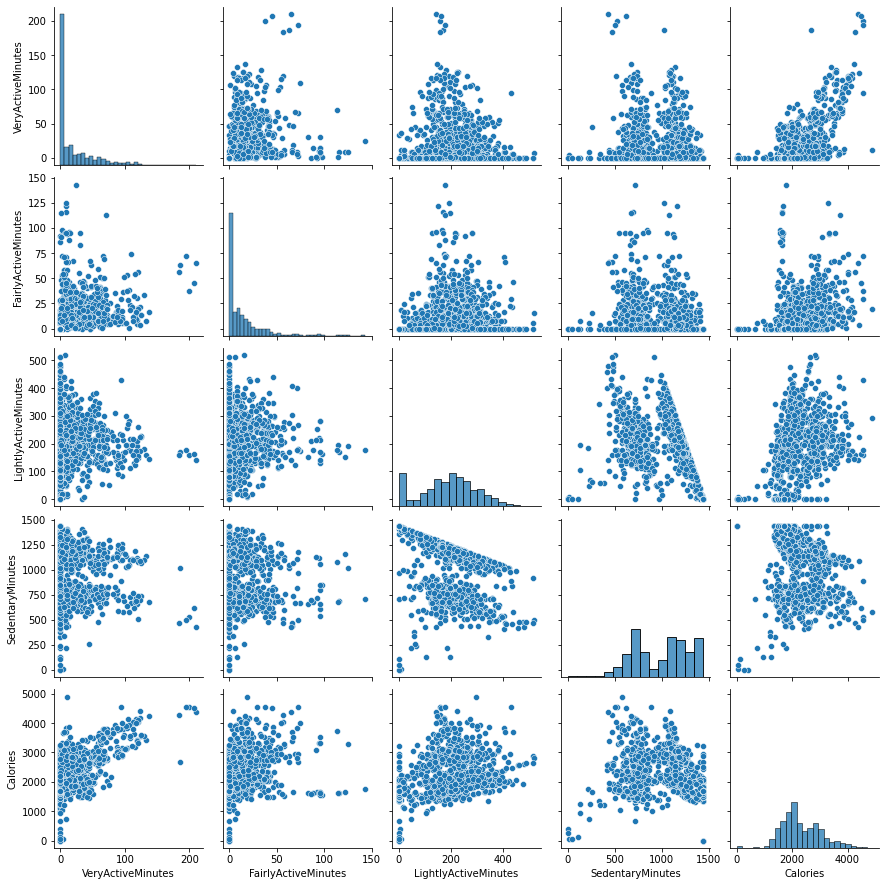

In [ ]:
# Visualizing data
import seaborn as sns
sns.pairplot(fitbit)


Text(0.5, 0, 'Calories')

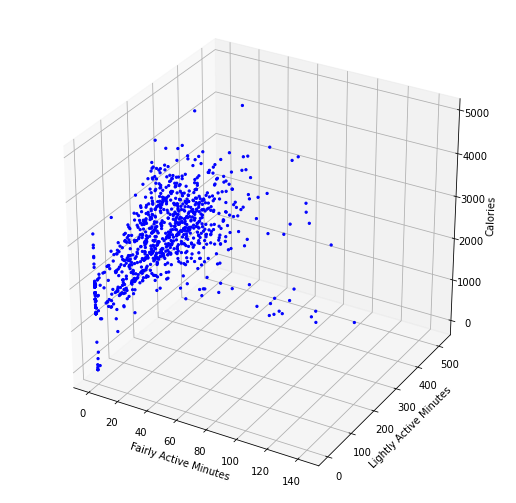

In [ ]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(xs = fitbit["FairlyActiveMinutes"], ys = fitbit["LightlyActiveMinutes"], zs=fitbit["Calories"],
           c='blue',
           alpha=1,
           marker='.')
ax.set_xlabel("Fairly Active Minutes")
ax.set_ylabel("Lightly Active Minutes")
ax.set_zlabel("Calories")

In [ ]:
model = LinearRegression()
train, test = train_test_split(fitbit,test_size=0.30,train_size=0.70)
X = train[["FairlyActiveMinutes","LightlyActiveMinutes"]]
Y = train["Calories"]
model.fit(X,Y)
print("Intercept:",model.intercept_ ,"\nCoefficients:",model.coef_)

Intercept: 1851.610988889105 
Coefficients: [12.61600824  1.53808172]


### **The obtained best fit model will only be valid if the predictor variables are linearly independent. If the coeffs are close to -1 or 1 then they can be called dependent.Hence, to determine the strength of linear relationship between the variables, correlation can be used.**

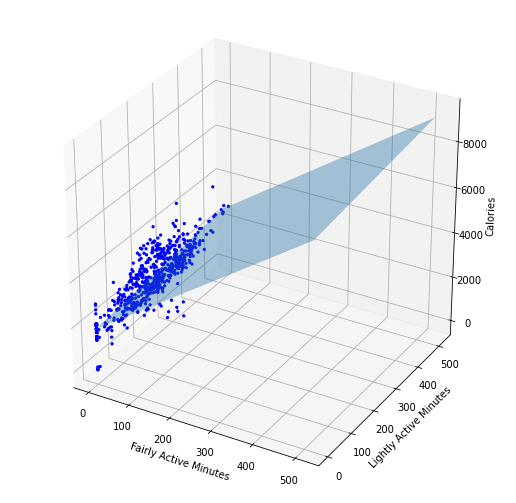

In [ ]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(xs = train["FairlyActiveMinutes"], ys = train["LightlyActiveMinutes"], zs=train["Calories"],
           c='blue',
           alpha=1,
           marker='.')
ax.set_xlabel("Fairly Active Minutes")
ax.set_ylabel("Lightly Active Minutes")
ax.set_zlabel("Calories")
x_surf = np.arange(train["FairlyActiveMinutes"].min(), train["LightlyActiveMinutes"].max(), 1) 
y_surf = np.arange(train["FairlyActiveMinutes"].min(), train["LightlyActiveMinutes"].max(), 1)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
X_mesh = pd.core.frame.DataFrame({'FairlyActiveMinutes': x_surf.ravel(), 'LightlyActiveMinutes': y_surf.ravel()})
out = model.predict(X_mesh)
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                alpha = 0.4)

In [ ]:
#finding the correlations
np.corrcoef([fitbit["FairlyActiveMinutes"],fitbit["LightlyActiveMinutes"],fitbit["Calories"]])

array([[1.        , 0.14881991, 0.29762347],
       [0.14881991, 1.        , 0.28671753],
       [0.29762347, 0.28671753, 1.        ]])

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
X=fitbit
vif = pd.Series([variance_inflation_factor(X.values,idx) 
           for idx in range(X.shape[1])],
          index=X.columns)
print(vif)

VeryActiveMinutes        2.482117
FairlyActiveMinutes      1.696101
LightlyActiveMinutes     4.755688
SedentaryMinutes         7.032325
Calories                17.575105
dtype: float64


So the predictors are correlated. Target is highly correlated